# 목표

KMRD 데이터 확인 및 기본 통계 분석


In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
class MovieDataLoader:
    def __init__(self, file_path = '../../data'):
        self.file_path = file_path
        self.__load_data()

    def __load_data(self):
        for file_name in os.listdir(self.file_path):
            self.file_name = []
            if file_name.endswith('.csv'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name)))
            if file_name.endswith('.txt'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name), sep='\t', engine='python'))



In [27]:
movie_data_loader = MovieDataLoader()
casting = movie_data_loader.castings
countries = movie_data_loader.countries
genres = movie_data_loader.genres
rates = movie_data_loader.rates

casting.head()


,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [28]:
countries.head()

,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [29]:
genres.head()

,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [30]:
rates.head()

,user,movie,rate,time
0,0,10003,7,1494128040
1,0,10004,7,1467529800
2,0,10018,9,1513344120
3,0,10021,9,1424497980
4,0,10022,7,1427627340


In [31]:
# 기본 통계 분석

# 영화별 평균 평점 계산
avg_rates = rates.groupby('movie')['rate'].mean().reset_index()
print("영화별 평균 평점:")
print(avg_rates.head())
print("\n평균 평점 통계:")
print(avg_rates['rate'].describe())


영화별 평균 평점:
   movie      rate
0  10001  9.294360
1  10002  9.416778
2  10003  9.270981
3  10004  9.120000
4  10005  9.048619

평균 평점 통계:
count    600.000000
mean       8.178464
std        1.156619
min        1.500000
25%        7.738351
50%        8.452277
75%        8.960590
max       10.000000
Name: rate, dtype: float64


In [32]:
# 장르별 영화 수 계산
genre_counts = genres['genre'].value_counts()
print("\n장르별 영화 수:")
print(genre_counts)

# 국가별 영화 수 계산
country_counts = countries['country'].value_counts()
print("\n국가별 영화 수:")
print(country_counts)



장르별 영화 수:
genre
드라마       529
코미디       233
액션        211
멜로/로맨스    172
스릴러       162
모험        117
범죄        117
SF         80
공포         79
전쟁         75
판타지        55
미스터리       48
뮤지컬        41
가족         40
서부         31
느와르        15
에로         10
애니메이션       6
다큐멘터리       3
서사          1
Name: count, dtype: int64

국가별 영화 수:
country
미국            654
영국             94
한국             94
프랑스            70
홍콩             51
이탈리아           43
독일(구 서독)       20
오스트레일리아        12
대만             10
스페인             7
캐나다             6
일본              6
중국              5
스웨덴             4
러시아(구 소련)       4
남아프리카 공화국       3
폴란드             3
알제리             2
독일              2
브라질             2
보츠와나            2
핀란드             1
국가불명            1
터키              1
벨기에             1
노르웨이            1
뉴질랜드            1
그리스             1
덴마크             1
아일랜드            1
네덜란드            1
아르헨티나           1
벨라루스(구 소련)      1
유고슬라비아          1
체코              1
멕시코             1
Name: coun

In [33]:

# 배우별 출연 영화 수 계산
actor_counts = casting['people'].value_counts()
print("\n가장 많이 출연한 배우 Top 3:")
print(actor_counts.head(3))



가장 많이 출연한 배우 Top 3:
people
1327    18
1422    13
1843    13
Name: count, dtype: int64


C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: User

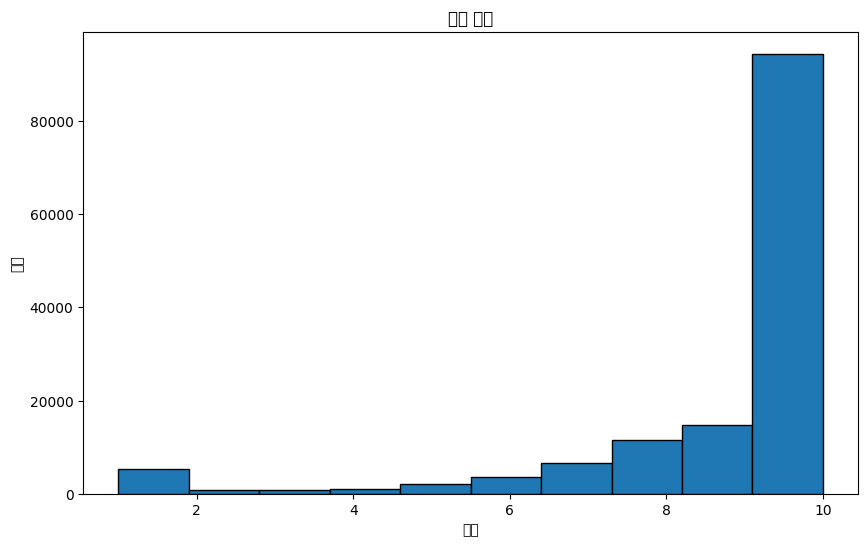

In [34]:

# 평점 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(rates['rate'], bins=10, edgecolor='black')
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('빈도')
plt.show()


C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seongyle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: U

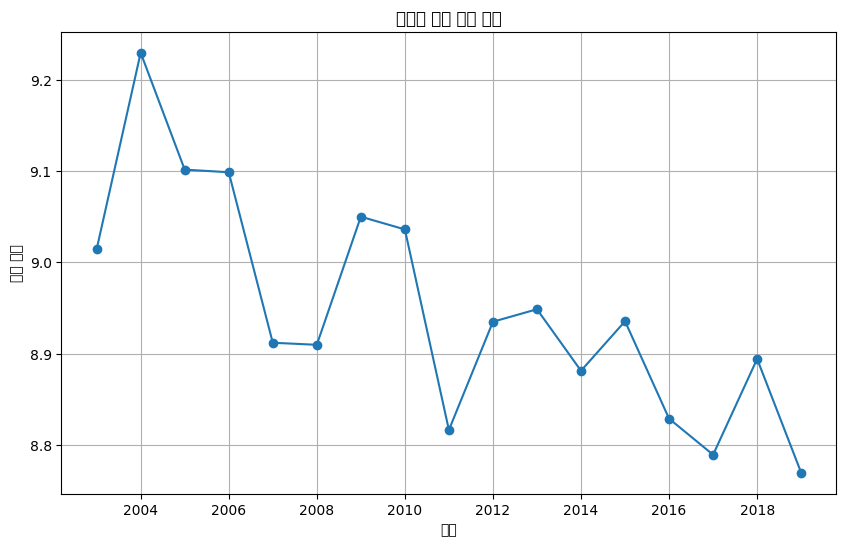

In [35]:

# 시간대별 평점 추이
rates['datetime'] = pd.to_datetime(rates['time'], unit='s')
rates['year'] = rates['datetime'].dt.year
yearly_avg = rates.groupby('year')['rate'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('연도별 평균 평점 추이')
plt.xlabel('연도')
plt.ylabel('평균 평점')
plt.grid(True)
plt.show()

